In [1]:
pip install ultralytics opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.8 MB/s eta 0:00:00


In [3]:
#import YOLO using ultralytics
from ultralytics import YOLO

model=  YOLO("yolov8n.pt")


In [4]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15909, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 15909 (delta 2), reused 4 (delta 1), pack-reused 15900 (from 1)
Receiving objects: 100% (15909/15909), 14.43 MiB | 15.47 MiB/s, done.
Resolving deltas: 100% (10710/10710), done.


In [5]:
%cd darknet

/content/darknet


In [7]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2025-08-28 12:05:13--  https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov3.weights
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/75388965/e42c2500-9016-11ea-92ba-11df9f79f31b?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-08-28T12%3A54%3A27Z&rscd=attachment%3B+filename%3Dyolov3.weights&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-08-28T11%3A53%3A37Z&ske=2025-08-28T12%3A54%3A27Z&sks=b&skv=2018-11-09&sig=d%2BSFwXy3JqK4wJXkzCFP1pxntT8OuaqWbCxvGMKIMcQ%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NjM4MzAxMywibmJmIjoxNzU2MzgyNzEzLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZ

In [9]:
import cv2


# Define paths to YOLO files

weights_path = "/content/darknet/yolov3.weights"   # You can also use 'yolov3-tiny.weights'
config_path  = "/content/darknet/yolov3.cfg"       # Or 'yolov3-tiny.cfg'
names_path   = "/content/darknet/coco.names"


# Load the YOLO network

net = cv2.dnn.readNetFromDarknet(config_path, weights_path)


# Load COCO class labels
with open(names_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Set backend/target for inference

net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)   # Default backend
# net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)      # Uncomment for CPU
# net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)     # Uncomment for GPU (if CUDA is available)


In [25]:
image = cv2.imread("/content/istockphoto-478525372-612x612.jpg")
height, width, _ =image.shape

    # Create a 4D blob from the image
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

In [26]:
# ==========================
# Get the names of output layers
# ==========================
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# ==========================
# Run a forward pass through the network
# ==========================
outs = net.forward(output_layers)

# Print raw output predictions
print(outs)


(array([[   0.030614,    0.045697,     0.30286, ...,           0,           0,           0],
       [   0.039224,    0.026553,     0.25059, ...,           0,           0,           0],
       [   0.043083,    0.028407,     0.83012, ...,           0,           0,           0],
       ...,
       [    0.96005,     0.94932,     0.41821, ...,           0,           0,           0],
       [     0.9588,      0.9619,     0.30378, ...,           0,           0,           0],
       [    0.96963,     0.96076,     0.83778, ...,           0,           0,           0]], dtype=float32), array([[   0.020581,    0.024413,    0.055943, ...,           0,           0,           0],
       [   0.013573,    0.019741,      0.3961, ...,           0,           0,           0],
       [   0.020663,     0.01903,    0.080673, ...,           0,           0,           0],
       ...,
       [    0.97635,     0.97882,    0.043588, ...,           0,           0,           0],
       [    0.98315,     0.97741,     

In [27]:
import numpy as np # Import numpy

boxes = []        # List to store bounding box coordinates
confidences = []  # List to store confidence scores
class_ids = []    # List to store predicted class IDs

# Loop over each output from the network
for out in outs:
    for detection in out:
        # Extract class scores starting from index 5
        scores = detection[5:]
        class_id = np.argmax(scores)       # Class with highest score
        confidence = scores[class_id]      # Confidence for that class

        # Filter out weak predictions
        if confidence > 0.5:  # Confidence threshold
            # Scale detection back to the image size
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Derive top-left corner of bounding box
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            # Save results
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [28]:
from google.colab.patches import cv2_imshow

In [29]:
# Apply Non-Maximum Suppression (NMS)
nms_threshold = 0.4     # NMS threshold
conf_threshold = 0.5    # Confidence threshold

indexes = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)


# Draw bounding boxes and labels
if len(indexes) > 0:
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])      # Get class name
        confidence = f"{confidences[i]:.2f}"    # Format confidence to 2 decimals

        # Draw rectangle
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Draw label text
        cv2.putText(
            image,
            f"{label} {confidence}",
            (x, y - 10),
            cv2.FONT_HERSHEY_PLAIN,
            2,
            (0, 255, 0),
            2
        )


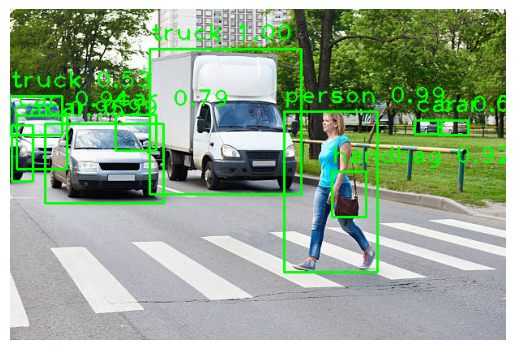

In [30]:
import matplotlib.pyplot as plt
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

Q1.   
What is the trade-off of resizing? If you shrink an image of a crowded street too much to make it faster, what critical information might you lose?    
      
When you resize an image to a smaller size, the model processes it faster, but fine details can get lost. For example, in a crowded street, shrinking the image too much might make small objects like a child in the distance, a bicycle, or a traffic sign appear as just a few pixels. The model may then fail to recognize them or confuse them with the background. So, while resizing improves speed, it can reduce accuracy by missing critical information, especially for small or far-away objects.

Q2.    
When would grayscaling be a bad idea? Name a detection task
where color is the most important feature. (e.g., identifying traffic
light status, sorting ripe vs. unripe fruit).
    
Grayscaling would be a bad idea when color itself is the key feature for detection. For example, in identifying the status of a traffic light, the model must distinguish between red, yellow, and green. If the image is converted to grayscale, all three lights may look almost the same in brightness, making it impossible to tell the signal. Similarly, in sorting ripe vs. unripe fruit, removing color would erase the main clue (like green vs. yellow bananas), leading to wrong predictions.

Q3.    
Blurring intentionally destroys information. Imagine you are building a
system to read license plates from a security camera. How could blurring be
helpful? How could it be harmful if you apply too much?    

Blurring can actually be useful in a license plate reading system because it helps reduce noise from the background — like headlights, reflections, or dust in the air — so the model can focus better on the actual characters. But if you blur too much, you’ll lose the fine details of the numbers and letters on the plate, making them unreadable. For example, a slight blur might smooth out glare from a car’s shiny surface, but a heavy blur could turn “B8G” into an unrecognizable smudge.